# Multiple Regression

- Understanding MLR in terms of applications, potential problems, and how to assess model fit is at heart of more complex ML methods

- We will extend our knowledge of using one explanatory variable to predict our one response variable to using multiple exploratory variable to predict our response variable

- We will be able to predict quantitative and catorigal variables

- We will learn pros and cons of this modelling technique

    - we will assess problems that can happen in multiple linear regression, how to address these problems, and how to assess how well our model is performing
    
    - R^2 can be used, but might be misleading
    
    - Correlation coefficient is only useful for two quantitative variables, so it might not be useful in multiple linear regression case

- we will learn how to interpret our results


- recommended here [intro to statistical learning](http://faculty.marshall.usc.edu/gareth-james/)

    - great for getting started with ML
    - [solutions in python jupyter notebooks](https://www.reddit.com/r/learnpython/comments/6rkh3u/introduction_to_statistical_learning_with_python/)

- Example:

    - we want to invest in a home and we think it is worth more then the listed price
    
    - price, neighborhood (A,B,C), area, bedrooom, bathroom, style
    
    - before we used area only, now we willl learn how to use all of them 
    
- We can use linear algebra to use all of these inputs at the same time

    - create a matrix of inputs, a vector of responce
    
        - $ y = X$ wheree X is the input matrix and y is the response vector
        
- To fully understand how the functions used in Python work to fit multiple linear regression models, we need a firm grasp of linear algebra

In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm;
import matplotlib.pyplot as plt
import seaborn as sb

In [6]:
df = pd.read_csv("./data-2/house_prices.csv")

In [7]:
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


In [8]:
df['intercept'] = 1
x_values = ['intercept', 'area',
            'bedrooms', 'bathrooms']

lm = sm.OLS(df['price'], df[x_values]);

In [9]:
results = lm.fit()
results.summary()
m_results = results

Notice that only know area is statistically significant. This is because of multicollinearity

Also notice that the R squared is now not equal to the sum of the other R sqaured, is actually equal to the max of the three

In [10]:
lm = sm.OLS(df['price'], df[['intercept', 'area']]);
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                 1.269e+04
Date:                Tue, 14 Apr 2020   Prob (F-statistic):               0.00
Time:                        08:50:29   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6026   BIC:                         1.691e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9587.8878   7637.479      1.255      0.209   -5384.303    2.46e+04
area         348.4664      3.093    112.662      0.000     342.403     354.530
==============================================================================
Omnibus:                      368.609   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.279
Skew:                           0.534   Prob(JB):                     1.43e-76
Kurtosis:                       2.499   Cond. No.                     4.93e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
lm = sm.OLS(df['price'], df[['intercept','bedrooms']]);
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     7446.
Date:                Tue, 14 Apr 2020   Prob (F-statistic):               0.00
Time:                        08:50:29   Log-Likelihood:                -85509.
No. Observations:                6028   AIC:                         1.710e+05
Df Residuals:                    6026   BIC:                         1.710e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -9.485e+04   1.08e+04     -8.762      0.000   -1.16e+05   -7.36e+04
bedrooms    2.284e+05   2646.744     86.289      0.000    2.23e+05    2.34e+05
==============================================================================
Omnibus:                      967.118   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1599.431
Skew:                           1.074   Prob(JB):                         0.00
Kurtosis:                       4.325   Cond. No.                         10.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
lm = sm.OLS(df['price'], df[['intercept', 'bathrooms']]);
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     7116.
Date:                Tue, 14 Apr 2020   Prob (F-statistic):               0.00
Time:                        08:50:29   Log-Likelihood:                -85583.
No. Observations:                6028   AIC:                         1.712e+05
Df Residuals:                    6026   BIC:                         1.712e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.314e+04   9587.189      4.500      0.000    2.43e+04    6.19e+04
bathrooms   3.295e+05   3905.540     84.358      0.000    3.22e+05    3.37e+05
==============================================================================
Omnibus:                      915.429   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1537.531
Skew:                           1.010   Prob(JB):                         0.00
Kurtosis:                       4.428   Cond. No.                         5.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Note that when we make 3 simple linear regressions, they all sum up to more then 1. This is becasue they aren't independent variables 

## How we get the coefficients for the MLR model

In [13]:
m_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4230.
Date:                Tue, 14 Apr 2020   Prob (F-statistic):               0.00
Time:                        08:50:29   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6024   BIC:                         1.691e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.007e+04   1.04e+04      0.972      0.331   -1.02e+04    3.04e+04
area         345.9110      7.227     47.863      0.000     331.743     360.079
bedrooms   -2925.8063   1.03e+04     -0.285      0.775    -2.3e+04    1.72e+04
bathrooms   7345.3917   1.43e+04      0.515      0.607   -2.06e+04    3.53e+04
==============================================================================
Omnibus:                      367.658   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.116
Skew:                           0.536   Prob(JB):                     9.40e-77
Kurtosis:                       2.503   Cond. No.                     1.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
# Input Matrix
X = df[x_values]
X.head()

,intercept,area,bedrooms,bathrooms
0,1,1188,3,2
1,1,3512,5,3
2,1,1134,3,2
3,1,1940,4,2
4,1,2208,6,4


In [15]:
# Response Vector
y = df["price"]
y.head()

0     598291
1    1744259
2     571669
3     493675
4    1101539
Name: price, dtype: int64

Regression Closed Form Solution: $ (X'X)^{-1}X'y$

If we use this, we will get the cofficients

- We need:

    - transpose, inverses, and dot product

In [16]:
np.dot(np.dot(np.linalg.inv(np.dot(X.transpose(), X)), X.transpose()), y)

array([10072.10704672,   345.91101884, -2925.80632467,  7345.3917137 ])

In [17]:
m_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4230.
Date:                Tue, 14 Apr 2020   Prob (F-statistic):               0.00
Time:                        08:50:29   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6024   BIC:                         1.691e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.007e+04   1.04e+04      0.972      0.331   -1.02e+04    3.04e+04
area         345.9110      7.227     47.863      0.000     331.743     360.079
bedrooms   -2925.8063   1.03e+04     -0.285      0.775    -2.3e+04    1.72e+04
bathrooms   7345.3917   1.43e+04      0.515      0.607   -2.06e+04    3.53e+04
==============================================================================
Omnibus:                      367.658   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.116
Skew:                           0.536   Prob(JB):                     9.40e-77
Kurtosis:                       2.503   Cond. No.                     1.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Having an understanding of the operation techniques we willl understand why certain operations don't work

## Multiple Linear Regretion Model Results

- It is essentially the same as with single linear regression, but we need to think about holding all other variables constant

- If we are looking at the area of the house, we can see that the price will go up by 345.91 dollars, assuming all other variables stay the same

- Slope interpretation: 

    - with every unit chang increase in explanatory variable, it brings y more units given coefficient, holding everything else constant
    
- P values:

    - quick check on whether the values are statistically significant

## Dummy Variables

- Encoded categorical variables

- Turn each value of column with 1,0  encoding

    - we create a new column for each level in a category (in this case A, B, C) then our new columns hold 1 or 0 depending on the presence of the level in a column
    
- We drop the column (the baseline) that had the original data

- Say we have 3 levels, we add 2 dummy variables 

- Say we have 2 levels, we add 1 dummy variba;e

### Math of Dummy Variables

- in order to take the inverse of a matrix, it must be full rank

    - our formula contains and inverse, so we need that resuult to be full rank
    
    - A matrix is full row rank when each of the rows of the matrix are linearly independent and full column rank when each of the columns of the matrix are linearly independent.
    
- Dot product of $XX'$ must be invertible

In [18]:
df = pd.read_csv('./data-2/house_prices.csv')
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


In [19]:
df[["A", "B","C"]] = pd.get_dummies(df["neighborhood"])

In [20]:
cols = sorted(list(df["style"].unique()))
df[cols] = pd.get_dummies(df["style"])

In [21]:
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,A,B,C,lodge,ranch,victorian
0,1112,B,1188,3,2,ranch,598291,0,1,0,0,1,0
1,491,B,3512,5,3,victorian,1744259,0,1,0,0,0,1
2,5952,B,1134,3,2,ranch,571669,0,1,0,0,1,0
3,3525,A,1940,4,2,ranch,493675,1,0,0,0,1,0
4,5108,B,2208,6,4,victorian,1101539,0,1,0,0,0,1


In [22]:
df["intercept"] = 1
lm = sm.OLS(df["price"], df[["intercept", "lodge", "ranch"]])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     1548.
Date:                Tue, 14 Apr 2020   Prob (F-statistic):               0.00
Time:                        08:50:29   Log-Likelihood:                -86683.
No. Observations:                6028   AIC:                         1.734e+05
Df Residuals:                    6025   BIC:                         1.734e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.046e+06   7775.607    134.534      0.000    1.03e+06    1.06e+06
lodge      -7.411e+05   1.44e+04    -51.396      0.000   -7.69e+05   -7.13e+05
ranch       -4.71e+05   1.27e+04    -37.115      0.000   -4.96e+05   -4.46e+05
==============================================================================
Omnibus:                     1340.120   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3232.810
Skew:                           1.230   Prob(JB):                         0.00
Kurtosis:                       5.611   Cond. No.                         3.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Intrepretation

- The intercept means that we predict a victorian home to be about 1,046,000 and the lodge to be about 1,046,000 - 741,000=305,000, ranch 1,046,000 - 471,000=575000

    - our baseline category is victorian and then we have predictions from the baseline

In [23]:
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,A,B,C,lodge,ranch,victorian,intercept
0,1112,B,1188,3,2,ranch,598291,0,1,0,0,1,0,1
1,491,B,3512,5,3,victorian,1744259,0,1,0,0,0,1,1
2,5952,B,1134,3,2,ranch,571669,0,1,0,0,1,0,1
3,3525,A,1940,4,2,ranch,493675,1,0,0,0,1,0,1
4,5108,B,2208,6,4,victorian,1101539,0,1,0,0,0,1,1


In [24]:
lm = sm.OLS(df["price"], df[["intercept", "B", "C"]])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     983.1
Date:                Tue, 14 Apr 2020   Prob (F-statistic):               0.00
Time:                        08:50:29   Log-Likelihood:                -87082.
No. Observations:                6028   AIC:                         1.742e+05
Df Residuals:                    6025   BIC:                         1.742e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.411e+05   1.05e+04     51.537      0.000    5.21e+05    5.62e+05
B           5.295e+05    1.4e+04     37.870      0.000    5.02e+05    5.57e+05
C           -332.3594   1.52e+04     -0.022      0.983   -3.01e+04    2.94e+04
==============================================================================
Omnibus:                      689.315   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1154.155
Skew:                           0.793   Prob(JB):                    2.39e-251
Kurtosis:                       4.442   Cond. No.                         3.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

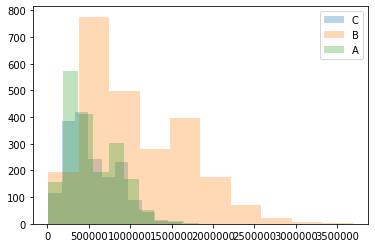

In [25]:
plt.hist(df.query("C == 1")['price'], alpha = 0.3, label = 'C');
plt.hist(df.query("B == 1")['price'], alpha = 0.3, label = 'B');
plt.hist(df.query("A == 1")['price'], alpha = 0.3, label = 'A');

plt.legend();

In [26]:
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,A,B,C,lodge,ranch,victorian,intercept
0,1112,B,1188,3,2,ranch,598291,0,1,0,0,1,0,1
1,491,B,3512,5,3,victorian,1744259,0,1,0,0,0,1,1
2,5952,B,1134,3,2,ranch,571669,0,1,0,0,1,0,1
3,3525,A,1940,4,2,ranch,493675,1,0,0,0,1,0,1
4,5108,B,2208,6,4,victorian,1101539,0,1,0,0,0,1,1


In [27]:
df["intercept_style"] = 1
df["intercept_neighborhood"] = 1

lm = sm.OLS(df["price"], df[["intercept",
                             "intercept_neighborhood",
                             "B", "C",
                            "intercept_style",
                            "victorian", "lodge",
                            "bathrooms", "bedrooms"]])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     4250.
Date:                Tue, 14 Apr 2020   Prob (F-statistic):               0.00
Time:                        08:50:29   Log-Likelihood:                -82944.
No. Observations:                6028   AIC:                         1.659e+05
Df Residuals:                    6021   BIC:                         1.659e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
intercept              -1.278e+05   3993.191    -31.995      0.000   -1.36e+05    -1.2e+05
intercept_neighborhood -1.278e+05   3993.191    -31.995      0.000   -1.36e+05    -1.2e+05
B                       5.229e+05   7040.928     74.271      0.000    5.09e+05    5.37e+05
C                      -7168.6285   7639.254     -0.938      0.348   -2.21e+04    7807.045
intercept_style        -1.278e+05   3993.191    -31.995      0.000   -1.36e+05    -1.2e+05
victorian               7.056e+04   8337.790      8.463      0.000    5.42e+04    8.69e+04
lodge                   1.685e+05   9906.629     17.012      0.000    1.49e+05    1.88e+05
bathrooms               9.996e+04   1.09e+04      9.164      0.000    7.86e+04    1.21e+05
bedrooms                1.732e+05   7677.152     22.558      0.000    1.58e+05    1.88e+05
==============================================================================
Omnibus:                      978.611   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2926.472
Skew:                           0.848   Prob(JB):                         0.00
Kurtosis:                       5.962   Cond. No.                     4.26e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.54e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- When we use 1,0 encoding we compare it to baselline category

- But when we use other encodings (like 1,0,-1 encoding default in SAS) then coefficient is comparrison to avergae regardless of group

## Potential Problems

- When building MLR models, there are a number of problems that arise

- Chapter 3 of introduction to statistical learning goes in depth on this

- But what costitues a problem is depending on what model is used for

    - are we trying to see how x,y variables are related
    
    - model to best predict the response variable
    
    - are we interested in seeng which variables are really useful in predicting response
    
- Depending on which problems I am trying to solve with regression model, it determines which issues I care about addressing

- Problems (academic approach):

    - a linear relationship may not exist between response and predictor variables
    
        - we can plot the residuals 
    
    - we might have correlated errors
    
        - occurs when data is collected over time or spatially related
        
            - forcasting future interest rates, or predicting flood patterns
    
        - big issue is that we can use the correlated errors to better predict future events or spatially close events
        
            - Durbin Watson test to see whether correlation of errors is an issue
            
            - Then we can use ARIMA or ARMA models we can implement to use the correlation for better predictions
    
    - we might not have constant variance of errors/ Normally distributed errors
    
        - Spread of predicted values differ depending on which values you are trying to predict
        
        - Leads to inaccurate and confidence intervals and p values
        
        - we can use a transformation of the response variable to get rid of the non constant variance
    
    - we might have outliers or leverage points that hurt model
    
    - we might have multicollinearity
    
- 

## Multicollinearity & VIF

- Mulitcollinearity is where x variables are correlated with one another rather then each other

    - leads to possible flipped regression coefficients 
    
    - inaccurate hypothesis testing results
    
        - Having correlated explanatory variabllels means our coefficient estimates are less stable. Standard devations (standard errors) associated with your regression coefficients aree quite large
        
            - we won't see that that variable is actually good at predicting response
    
    - 
    
- We can identify Multicollinearity with:

    - scatterplot matrix
    
    - variance inflation factors
    
        - if we have larger then 10 in VIF then we have multicollinearity in our model
        
        ${VIF}_i = \frac{1}{1-R_i^2} $
        
            - $R_i^2$ is that x variables $R^2$ being used to predict the computer $R_i^2$
            
            - So high $R^2$ will decrease denominator, increasing VIF
            
    - We can then remove the high VIF variable with the least amount of interest

- One of the main assumptions of MLR models is that our predictor variables to be uncorrelated with each other

- we want them to be correlated with our response, but not each other

- E.g. area, bedrooms, and bathrooms are all probably correlated with each other

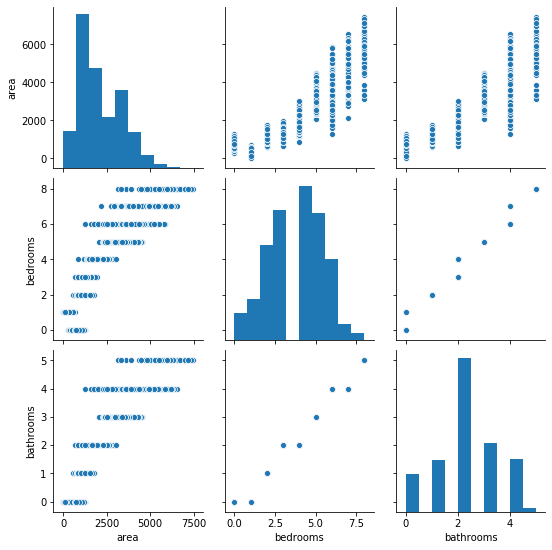

In [29]:
sb.pairplot(df[['area', 'bedrooms', 'bathrooms']]);

We can see that the three values are positively correlated with each other

In [33]:
lm = sm.OLS(df['price'], df[["intercept", "area",
                        "bedrooms", "bathrooms"]]);
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4230.
Date:                Tue, 14 Apr 2020   Prob (F-statistic):               0.00
Time:                        08:53:18   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6024   BIC:                         1.691e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.007e+04   1.04e+04      0.972      0.331   -1.02e+04    3.04e+04
area         345.9110      7.227     47.863      0.000     331.743     360.079
bedrooms   -2925.8063   1.03e+04     -0.285      0.775    -2.3e+04    1.72e+04
bathrooms   7345.3917   1.43e+04      0.515      0.607   -2.06e+04    3.53e+04
==============================================================================
Omnibus:                      367.658   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.116
Skew:                           0.536   Prob(JB):                     9.40e-77
Kurtosis:                       2.503   Cond. No.                     1.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can see that bedrooms have a strong negative relationship now, contradicts the bivariate case

So this shows that there is a potential side effect of having multicollinearity in our model

VIF: variance inflation factors

- we can calculate vif for each x variable

In [52]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import \
    variance_inflation_factor
y, X = dmatrices('price ~ area + bedrooms + bathrooms',
                 df,
                 return_type='dataframe')

In [60]:
vif = pd.DataFrame()
vif["VIF Factor"] = \
        [variance_inflation_factor(X.values,i)
        for i in range(X.shape[1])]
vif["features"] = X.columns

In [61]:
# We should remove either bedroom or bathroom due
# to the high multicolinearity
vif

,VIF Factor,features
0,7.327102,Intercept
1,5.458190,area
2,20.854484,bedrooms
3,19.006851,bathrooms


In [62]:
lm = sm.OLS(df['price'], df[["intercept", "area",
                        "bedrooms"]]);
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     6345.
Date:                Tue, 14 Apr 2020   Prob (F-statistic):               0.00
Time:                        09:25:20   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6025   BIC:                         1.691e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7857.4509   9425.288      0.834      0.405   -1.06e+04    2.63e+04
area         346.4458      7.152     48.443      0.000     332.426     360.466
bedrooms    1626.8306   5191.702      0.313      0.754   -8550.763    1.18e+04
==============================================================================
Omnibus:                      368.146   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.224
Skew:                           0.535   Prob(JB):                     8.91e-77
Kurtosis:                       2.502   Cond. No.                     6.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
y, X = dmatrices('price ~ area + bedrooms',
                 df,
                 return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = \
        [variance_inflation_factor(X.values,i)
        for i in range(X.shape[1])]
vif["features"] = X.columns

In [64]:
vif

,VIF Factor,features
0,6.063895,Intercept
1,5.345400,area
2,5.345400,bedrooms


Notice these things:

- Removing the number of bathrooms didn't hurt predictive power of model ($R^2$ is the same) and we can now better interpret the coefficients

## Higher order terms

- Purpose: to sacrifice interpretibility for better predictive power

- It is possible to fit linear models that look like non linear models by adding higher order terms

    - interactions, quadratics, cubics, even higher order
    
        - $x_1 x_2$, $x^2$, $x^3$, $X^4$, ...
    
    - we might be able to better predict response, but we should be careful unless we see the relationship clearly in the data
    
        - it is more complex to interpret the results
        
        - slopes from lower order results are no longer easier to interpret when they show up in higher order terms
        
- So we would change for exmaple:

    - $\hat{y}=b_0 + b_1x_1 + b_2x_2$
    
    - $\hat{y} = b_0 + b_1x_1 + b_2x_1^2 + b_3x_2 + b_4x_1x_2 $
    
- We can see by amount of curves in data if a line might not be the best fit

- Note that when we create higher order term in our model, we also need to add lower order term

- How do we know to add interaction term?

    - the way that variable x1 is related to response is dependent on value x2 
    
    - we can see if slopes are equal we don't need an interaction, and if they are we could use one

In [67]:
# Here we create a quadratic relationship
df['bedrooms_squared'] = df['bedrooms'] * df['bedrooms']

In [69]:
lm = sm.OLS(df['price'], df[['intercept', 'bedrooms',
                        'bedrooms_squared']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     4199.
Date:                Tue, 14 Apr 2020   Prob (F-statistic):               0.00
Time:                        09:36:36   Log-Likelihood:                -85302.
No. Observations:                6028   AIC:                         1.706e+05
Df Residuals:                    6025   BIC:                         1.706e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept         1.509e+05   1.58e+04      9.524      0.000     1.2e+05    1.82e+05
bedrooms          5.223e+04   8906.834      5.865      0.000    3.48e+04    6.97e+04
bedrooms_squared  2.446e+04   1184.538     20.647      0.000    2.21e+04    2.68e+04
==============================================================================
Omnibus:                      626.860   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              916.588
Skew:                           0.793   Prob(JB):                    9.23e-200
Kurtosis:                       4.064   Cond. No.                         87.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- We can't interpret bedrooms coefficient as easy as we could before 

- It isn't the change in price for each additional bedroom anymore because change in price is the starting and ending member of bedrooms

    - e.g. changing from 3-4 bedrooms isn't the same as 4-5 bedrooms

In [71]:
lm = sm.OLS(df['price'], df[['intercept', 'bedrooms',
                        'bedrooms_squared']])
results = lm.fit()
results.summary()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,A,B,C,lodge,ranch,victorian,intercept,intercept_style,intercept_neighborhood,bedroom_squared,bedrooms_squared,area_bed
0,1112,B,1188,3,2,ranch,598291,0,1,0,0,1,0,1,1,1,9,9,3564
1,491,B,3512,5,3,victorian,1744259,0,1,0,0,0,1,1,1,1,25,25,17560
2,5952,B,1134,3,2,ranch,571669,0,1,0,0,1,0,1,1,1,9,9,3402
3,3525,A,1940,4,2,ranch,493675,1,0,0,0,1,0,1,1,1,16,16,7760
4,5108,B,2208,6,4,victorian,1101539,0,1,0,0,0,1,1,1,1,36,36,13248


In [73]:
df["intercept_style"] = 1
df["intercept_neighborhood"] = 1

lm = sm.OLS(df["price"], df[["intercept",
                             "intercept_neighborhood",
                             "A", "B",
                            "intercept_style",
                            "victorian", "ranch",
                            "area"]])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 1.372e+04
Date:                Tue, 14 Apr 2020   Prob (F-statistic):               0.00
Time:                        11:25:39   Log-Likelihood:                -80348.
No. Observations:                6028   AIC:                         1.607e+05
Df Residuals:                    6022   BIC:                         1.607e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
intercept               -6.61e+04   1846.915    -35.791      0.000   -6.97e+04   -6.25e+04
intercept_neighborhood  -6.61e+04   1846.915    -35.791      0.000   -6.97e+04   -6.25e+04
A                       -194.2464   4965.459     -0.039      0.969   -9928.324    9539.832
B                       5.243e+05   4687.484    111.844      0.000    5.15e+05    5.33e+05
intercept_style         -6.61e+04   1846.915    -35.791      0.000   -6.97e+04   -6.25e+04
victorian              -6262.7365   6893.293     -0.909      0.364   -1.98e+04    7250.586
ranch                  -1974.7032   5757.527     -0.343      0.732   -1.33e+04    9312.111
area                     348.7375      2.205    158.177      0.000     344.415     353.060
==============================================================================
Omnibus:                      114.369   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.082
Skew:                           0.271   Prob(JB):                     6.29e-31
Kurtosis:                       3.509   Cond. No.                     1.15e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.78e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [80]:
df["intercept_style"] = 1
df["area_squared"] = df["area"] ** 2

lm = sm.OLS(df["price"], df[["intercept",
                            "intercept_style",
                            "victorian", "ranch",
                            "area",
                            "area_squared"]])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     3173.
Date:                Tue, 14 Apr 2020   Prob (F-statistic):               0.00
Time:                        11:31:09   Log-Likelihood:                -84516.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6023   BIC:                         1.691e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept        9273.2290   6319.197      1.467      0.142   -3114.658    2.17e+04
intercept_style  9273.2290   6319.197      1.467      0.142   -3114.658    2.17e+04
victorian        2509.3956   1.53e+04      0.164      0.870   -2.75e+04    3.25e+04
ranch            9917.2547   1.27e+04      0.781      0.435    -1.5e+04    3.48e+04
area              334.0146     13.525     24.696      0.000     307.501     360.528
area_squared        0.0029      0.002      1.283      0.199      -0.002       0.007
==============================================================================
Omnibus:                      375.220   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              340.688
Skew:                           0.519   Prob(JB):                     1.05e-74
Kurtosis:                       2.471   Cond. No.                     1.80e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.5e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [81]:
# This model is better because it has same
# predictive power with more simplicity
df["intercept_style"] = 1
df["intercept_neighborhood"] = 1

lm = sm.OLS(df["price"], df[["intercept",
                             "intercept_neighborhood",
                             "A", "B",
                            "area"]])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 2.287e+04
Date:                Tue, 14 Apr 2020   Prob (F-statistic):               0.00
Time:                        11:34:40   Log-Likelihood:                -80348.
No. Observations:                6028   AIC:                         1.607e+05
Df Residuals:                    6024   BIC:                         1.607e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
intercept               -9.94e+04   2435.621    -40.813      0.000   -1.04e+05   -9.46e+04
intercept_neighborhood  -9.94e+04   2435.621    -40.813      0.000   -1.04e+05   -9.46e+04
A                       -139.2304   4964.552     -0.028      0.978   -9871.529    9593.069
B                       5.243e+05   4686.888    111.866      0.000    5.15e+05    5.33e+05
area                     347.2235      1.549    224.136      0.000     344.187     350.260
==============================================================================
Omnibus:                      125.348   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.990
Skew:                           0.287   Prob(JB):                     6.01e-34
Kurtosis:                       3.528   Cond. No.                     8.78e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.77e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""